In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv("qs-world-university-rankings-2017-to-2022-V2.csv")

In [109]:
df.drop("logo", axis=1, inplace=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   type                    6470 non-null   object 
 9   research_output         6480 non-null   object 
 10  student_faculty_ratio   6407 non-null   float64
 11  international_students  6318 non-null   object 
 12  size                    6480 non-null   object 
 13  faculty_count           6404 non-null   object 
dtypes: float64(2), int64(1), object(11)
memo

#### Checking for missing Data 
- score is missing a good amout of data so we may need to find an alternative or data else where for ranking

<AxesSubplot:>

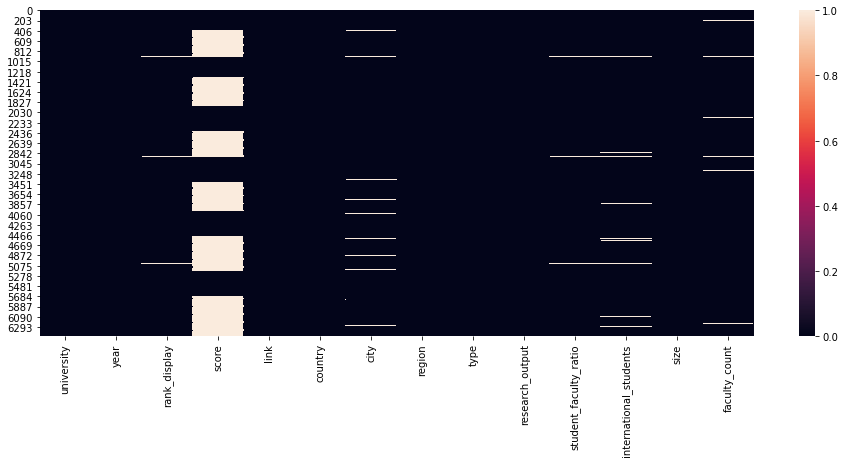

In [111]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull())

## Dropping Score and links
- since there is alof of the score missing from the data set and we cannot assume a score here we will remove 
- we wil use the rank display for the analysis since the is none missing as we see below
- will drop the links colum as well since we do not need to use this

In [112]:
df["rank_display"].isnull().count()

6482

In [113]:
df.drop(["score","link"], axis = 1, inplace=True)

## Unique universites
- Analizing how many unique universities are in our data set 
- 1368

In [114]:
df["university"].nunique()

1368

### Universities that appear the most
- A University appears at a mac of 6 times from 2017 - 2022(60+ universities)

In [115]:
(df['university'].value_counts() == 6).sum()

864

### Average Ranking per country

<AxesSubplot:>

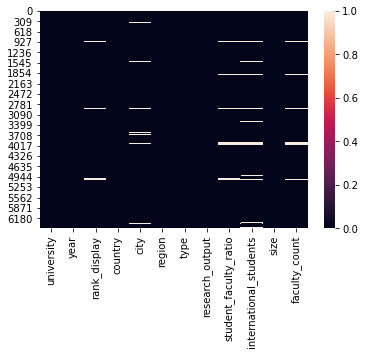

In [116]:
sns.heatmap(df.isnull())

In [117]:
df["city"] = df["city"].fillna("not added")

<AxesSubplot:>

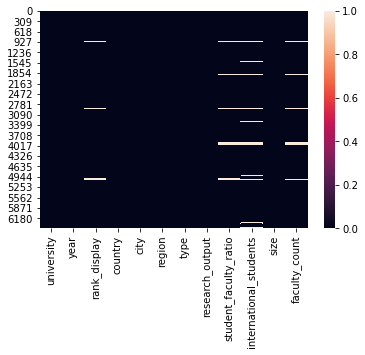

In [118]:
sns.heatmap(df.isnull())

In [119]:
df = df.dropna()

In [123]:
df[df["rank_display"] == "401-410"].head(2)

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
400,Bandung Institute of Technology (ITB),2017,401-410,Indonesia,Bandung,Asia,Public,Very High,9.0,613,L,"2,228"
401,Brandeis University,2017,401-410,United States,Waltham,North America,Private,Very High,9.0,1.554,M,611


In [125]:
df["rank_display"] = df["rank_display"].replace("401-410", "401")

In [130]:
df[df["rank_display"] == "411-420"].head(2)

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
409,Aix-Marseille University,2017,411-420,France,Marseille,Europe,Public,Very High,17.0,8.651,XL,4.069
410,Bilkent University,2017,411-420,Turkey,Ankara,Asia,Private,Very High,13.0,790,M,770


In [146]:
df["rank_display"] = [x.split("-")[0] for x in df["rank_display"]]

In [148]:
df["rank_display"] = pd.to_numeric(df["rank_display"])

In [151]:
df.head(3)

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,United States,Cambridge,North America,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,United States,Stanford,North America,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,United States,Cambridge,North America,Private,Very High,5.0,"5,877",L,"4,646"


In [153]:
df["student_faculty_ratio"] = pd.to_numeric(df["student_faculty_ratio"])

In [164]:
df["international_students"] = df["international_students"].map(lambda x: x.replace(",", ""))

In [165]:
df["international_students"] = pd.to_numeric(df["international_students"])

In [167]:
df["faculty_count"] = df["faculty_count"].map(lambda x: x.replace(",", ""))

In [168]:
df["faculty_count"] = pd.to_numeric(df["faculty_count"])

## Visualizations

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,United States,Cambridge,North America,Private,Very High,4.0,3730.0,M,3065.0
1,Stanford University,2017,2,United States,Stanford,North America,Private,Very High,3.0,3879.0,L,4725.0
2,Harvard University,2017,3,United States,Cambridge,North America,Private,Very High,5.0,5877.0,L,4646.0
3,University of Cambridge,2017,4,United Kingdom,Cambridge,Europe,Public,Very high,4.0,7925.0,L,5800.0
4,California Institute of Technology (Caltech),2017,5,United States,Pasadena,North America,Private,Very High,2.0,692.0,S,968.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6477,Université de Tunis,2022,1201,Tunisia,Tunis,Africa,Public,High,17.0,57.0,L,1174.0
6478,Université de Tunis El Manar,2022,1201,Tunisia,Tunis,Africa,Public,Very High,8.0,585.0,L,3504.0
6479,Yarmouk University,2022,1201,Jordan,Irbid,Asia,Public,Medium,31.0,2826.0,XL,1113.0
6480,Yildiz Technical University,2022,1201,Turkey,Istanbul,Asia,Public,High,20.0,2394.0,XL,1688.0


<AxesSubplot:xlabel='type', ylabel='count'>

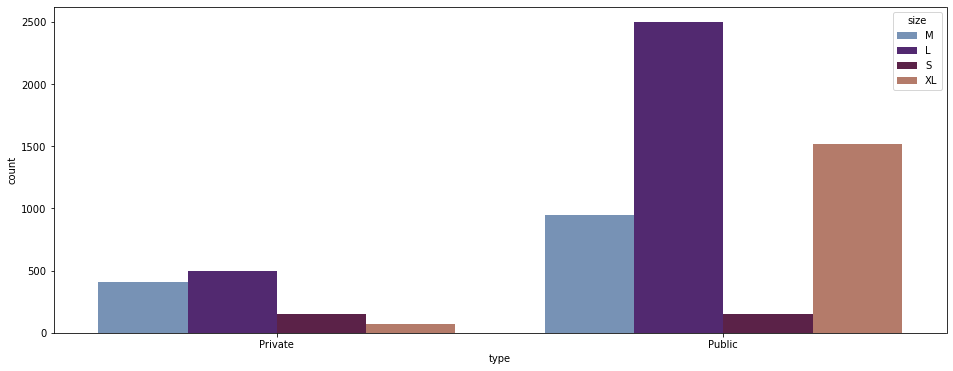

In [178]:
plt.figure(figsize=(16,6))
sns.countplot(x = df["type"], data = df, hue="size", palette="twilight")

<AxesSubplot:xlabel='type', ylabel='count'>

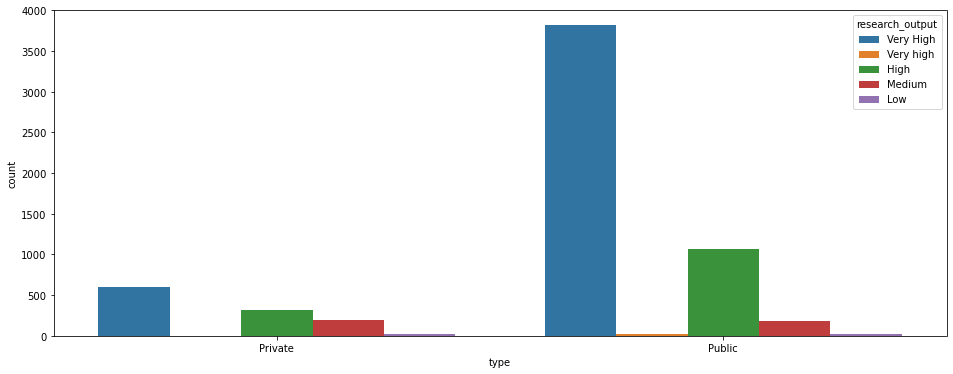

In [180]:
plt.figure(figsize=(16,6))
sns.countplot(x = df["type"], data = df, hue="research_output")

<AxesSubplot:xlabel='region', ylabel='count'>

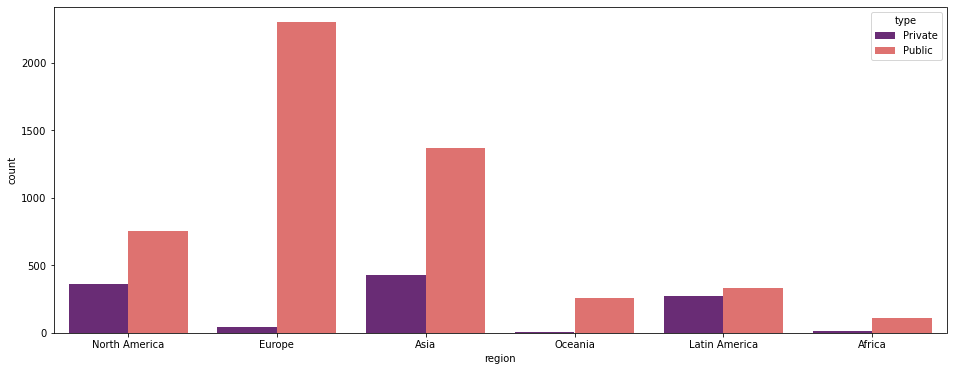

In [183]:
plt.figure(figsize=(16,6))
sns.countplot(x = df["region"], data = df, hue="type", palette="magma") 

In [185]:
df.head(2)

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,United States,Cambridge,North America,Private,Very High,4.0,3730.0,M,3065.0
1,Stanford University,2017,2,United States,Stanford,North America,Private,Very High,3.0,3879.0,L,4725.0


<AxesSubplot:xlabel='region', ylabel='faculty_count'>

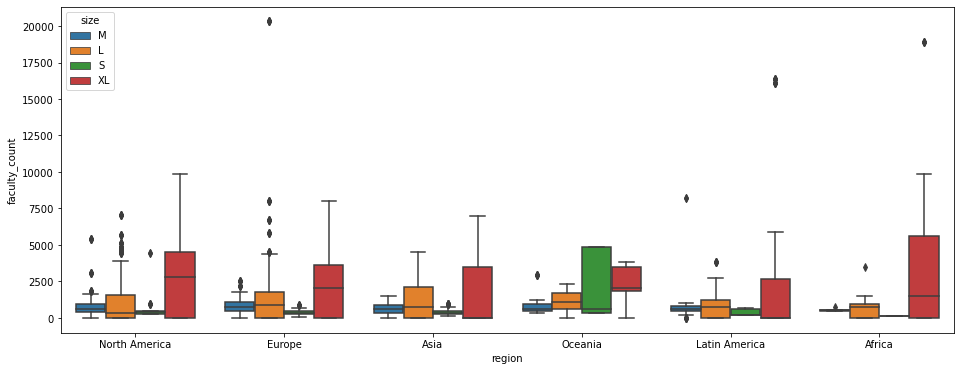

In [189]:
plt.figure(figsize=(16,6))
sns.boxplot(x = "region", y="faculty_count", data=df, hue= "size")

In [192]:
gp_by_year = df.groupby("year").mean()

In [193]:
gp_by_year

,rank_display,student_faculty_ratio,international_students,faculty_count
year,,,,
2017,423.052455,12.986607,2239.031247,1400.381790
2018,459.271186,13.100636,2152.738720,1360.593417
2019,471.297131,12.978484,2086.811242,1345.781680
2020,500.318490,13.074540,1983.419836,1294.465156
2021,539.939046,13.469081,1879.959276,1292.521475
2022,603.929700,13.783570,1772.070505,1263.499266


## Coorelation Analysis

In [194]:
gp_by_year.corr()

,rank_display,student_faculty_ratio,international_students,faculty_count
rank_display,1.000000,0.938478,-0.986464,-0.940085
student_faculty_ratio,0.938478,1.000000,-0.890130,-0.784159
international_students,-0.986464,-0.890130,1.000000,0.972765
faculty_count,-0.940085,-0.784159,0.972765,1.000000


<AxesSubplot:>

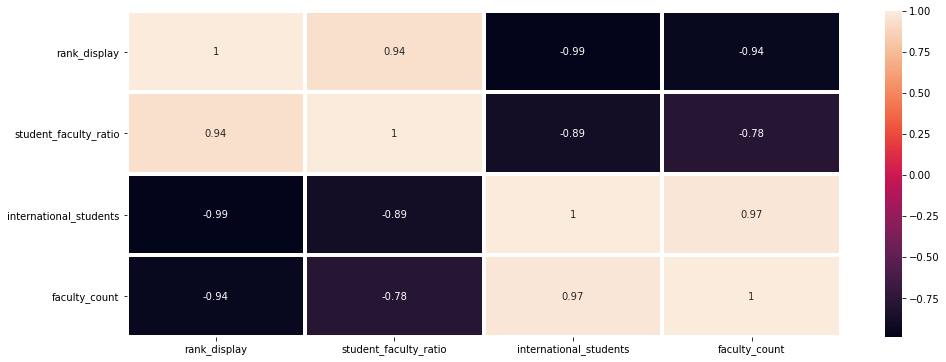

In [199]:
plt.figure(figsize=(16,6))
sns.heatmap(gp_by_year.corr(), linecolor="w", linewidths=3, annot=True)

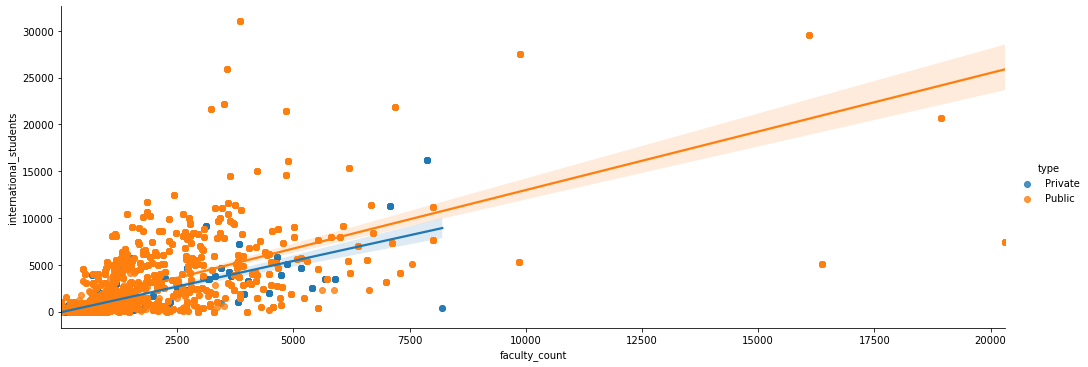

In [222]:
sns.lmplot(x="faculty_count", y = "international_students", data=df, hue= "type", aspect= 2.8, height=5)

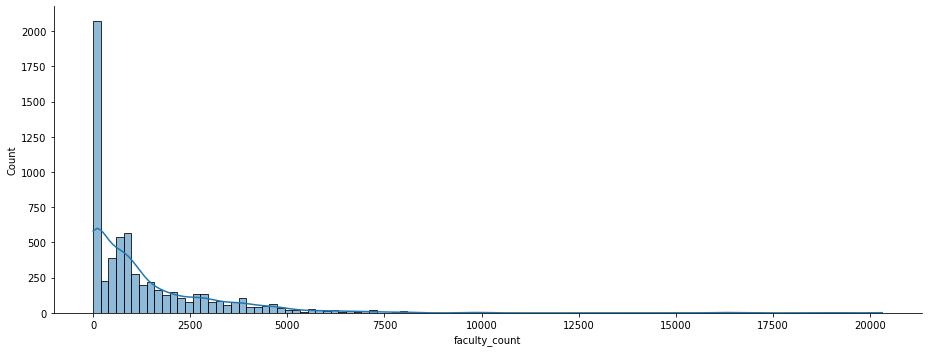

In [228]:
sns.displot(df["faculty_count"], aspect= 2.6, kde = True)

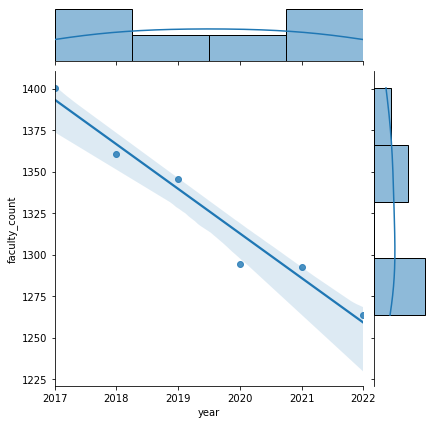

In [234]:
sns.jointplot(x = gp_by_year.index, y = "faculty_count" , data=gp_by_year, kind="reg")

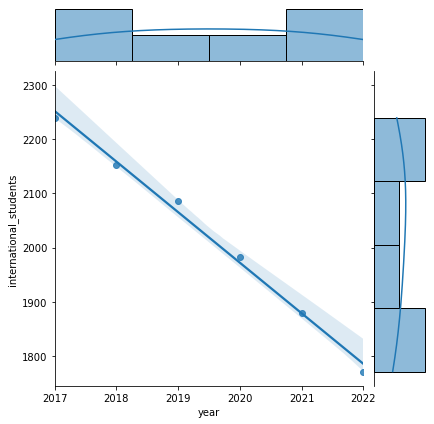

In [235]:
sns.jointplot(x = gp_by_year.index, y = "international_students" , data=gp_by_year, kind="reg")

## North America

In [239]:
usa = df[df["region"] == "North America"]

In [246]:
usa_byYear = usa.groupby('year').mean()

In [247]:
usa_byYear

,rank_display,student_faculty_ratio,international_students,faculty_count
year,,,,
2017,367.636872,12.631285,2549.135721,1591.918475
2018,397.333333,12.633880,2494.137536,1581.644481
2019,394.395604,12.697802,2507.154775,1565.708462
2020,413.454054,12.713514,2479.584697,1578.178054
2021,432.217391,12.777174,2492.381353,1562.396413
2022,494.380488,13.185366,2359.919283,1504.941171


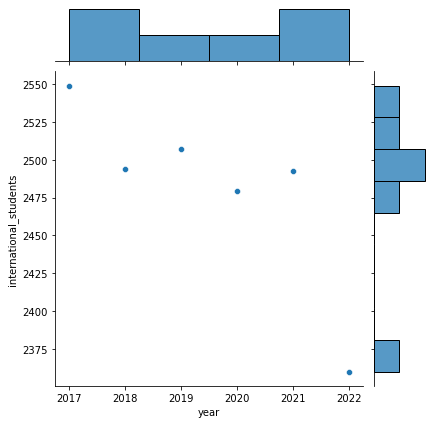

In [248]:
sns.jointplot(x = usa_byYear.index, y = "international_students", data=usa_byYear)

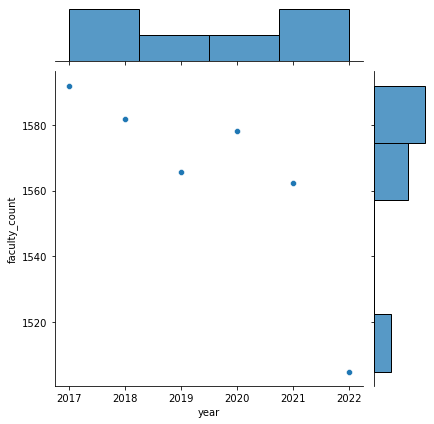

In [249]:
sns.jointplot(x = usa_byYear.index, y = "faculty_count", data=usa_byYear)

In [252]:
usa_byYear["fac_change"] = usa_byYear["faculty_count"].pct_change()

In [253]:
usa_byYear

,rank_display,student_faculty_ratio,international_students,faculty_count,fac_change
year,,,,,
2017,367.636872,12.631285,2549.135721,1591.918475,NaN
2018,397.333333,12.633880,2494.137536,1581.644481,-0.006454
2019,394.395604,12.697802,2507.154775,1565.708462,-0.010076
2020,413.454054,12.713514,2479.584697,1578.178054,0.007964
2021,432.217391,12.777174,2492.381353,1562.396413,-0.010000
2022,494.380488,13.185366,2359.919283,1504.941171,-0.036774


In [254]:
usa_byYear["international_students"] = usa_byYear["international_students"].pct_change()

In [255]:
usa_byYear

,rank_display,student_faculty_ratio,international_students,faculty_count,fac_change
year,,,,,
2017,367.636872,12.631285,NaN,1591.918475,NaN
2018,397.333333,12.633880,-0.021575,1581.644481,-0.006454
2019,394.395604,12.697802,0.005219,1565.708462,-0.010076
2020,413.454054,12.713514,-0.010997,1578.178054,0.007964
2021,432.217391,12.777174,0.005161,1562.396413,-0.010000
2022,494.380488,13.185366,-0.053147,1504.941171,-0.036774


In [257]:
usa["city"].value_counts()

New York City    30
Chicago          24
Newark           18
Atlanta          18
Toronto          18
                 ..
Boca Raton        1
Mobile            1
Starkville        1
Terre Haute       1
Kalamazoo         1
Name: city, Length: 166, dtype: int64

<AxesSubplot:xlabel='type', ylabel='student_faculty_ratio'>

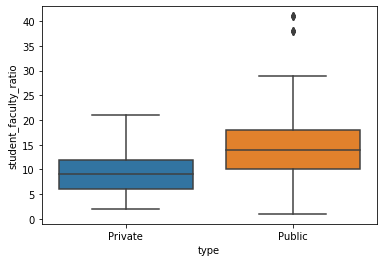

In [263]:
sns.boxplot(x= "type", y = "student_faculty_ratio", data = usa)